In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#create lists 
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []
city_list = []

print("--------Beginning Data Retrieval--------")

for city in cities:
    query_url = url + "&q=" + city
    
    #parse out the information in json
    weather_json = requests.get(query_url).json()

    #wrap it in a try: except: in case there are missing info for some cities
    try:
        #append info to list 
        lat.append(weather_json["coord"]["lat"])
    except: 
        #if there is missing info, add a nan value
        lat.append(np.nan)
        
    try:
        lng.append(weather_json["coord"]["lon"])
    except:
        lng.append(np.nan)
        
    try:
        temp.append(weather_json["main"]["temp"])
    except:
        temp.append(np.nan)
        
    try:
        humidity.append(weather_json["main"]["humidity"])
    except:
        humidity.append(np.nan)
        
    try:
        clouds.append(weather_json["clouds"]["all"])
    except:
        clouds.append(np.nan)
        
    try:
        wind_speed.append(weather_json["wind"]["speed"])
    except:
        wind_speed.append(np.nan)
    
    try:
        date.append(weather_json["dt"])
    except:
        date.append(np.nan)
        
    try:
        country.append(weather_json["sys"]["country"])
    except:
        country.append(np.nan)
        
    try:
        city_list.append(weather_json["name"])
    except:
        city_list.append(np.nan)
    
    #print processing log
    try:
        city_name = weather_json["name"]
        city_id = weather_json["id"]

        print("Processing " + city_name + " | City ID: " + str(city_id))
        print(query_url)
    except KeyError: 
        print("Skipping.. no city information")

print("====================================================")
print("Data Retrieval Complete")
print("====================================================")

--------Beginning Data Retrieval--------
Processing Manzhouli | City ID: 2035836
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=manzhouli
Processing Punta Arenas | City ID: 3874787
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=punta arenas
Processing Ribeira Grande | City ID: 3372707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ribeira grande
Processing Nazas | City ID: 3995005
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=nazas
Processing Avarua | City ID: 4035715
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=avarua
Processing Oeiras | City ID: 3393764
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=oeiras
Processing Port Alfred | City ID: 964432
http

Processing Churapcha | City ID: 2025241
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=churapcha
Processing Husavik | City ID: 5961417
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=husavik
Processing Faanui | City ID: 4034551
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=faanui
Processing Chuy | City ID: 3443061
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=chuy
Processing Teahupoo | City ID: 4033543
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=teahupoo
Processing Lafia | City ID: 2332515
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lafia
Processing Coolum Beach | City ID: 2170581
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2

Processing Punakha | City ID: 1252495
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=punakha
Processing Port Elizabeth | City ID: 4501427
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=port elizabeth
Processing Pulandian | City ID: 1798490
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pulandian
Processing Chanthaburi | City ID: 1611269
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=chanthaburi
Processing Puerto Ayora | City ID: 3652764
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=puerto ayora
Processing Bo Phloi | City ID: 1153850
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bo phloi
Processing Mount Isa | City ID: 2065594
http://api.openweathermap.or

Processing La Crosse | City ID: 5258957
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=la crosse
Processing Sangar | City ID: 2017215
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=sangar
Processing Kailua | City ID: 5847486
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kailua
Skipping.. no city information
Processing Del Rio | City ID: 5520076
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=del rio
Processing Cofradia | City ID: 1702540
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cofradia
Processing Cumra | City ID: 317844
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cumra
Processing Neftcala | City ID: 147425
http://api.openweathermap.org/data/2.5/w

Processing Bereda | City ID: 3105522
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bereda
Processing Rio Gallegos | City ID: 3838859
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=rio gallegos
Processing Kamina | City ID: 214614
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kamina
Processing Esperance | City ID: 3573739
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=esperance
Processing Mokshan | City ID: 525659
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mokshan
Processing Champerico | City ID: 3530097
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=champerico
Processing Kaeo | City ID: 2189343
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Badarwas | City ID: 1278006
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=badarwas
Processing Erzin | City ID: 296852
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=erzin
Processing Kutulik | City ID: 2021116
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kutulik
Skipping.. no city information
Processing Batagay-Alyta | City ID: 2027042
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=batagay-alyta
Skipping.. no city information
Processing Tilichiki | City ID: 2120591
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=tilichiki
Processing Easton | City ID: 4935623
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=easton
Processing Les Cayes | City ID: 3

Processing Okahandja | City ID: 3354898
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=okahandja
Processing Hervey Bay | City ID: 2146219
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hervey bay
Processing San Francisco del Mar | City ID: 3524965
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=san francisco del mar
Processing Carbonia | City ID: 2525362
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=carbonia
Processing Aykhal | City ID: 2027296
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=aykhal
Processing Arraial do Cabo | City ID: 3471451
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=arraial do cabo
Processing Kuopio | City ID: 650225
http://api.openw

Processing Puerto Quijarro | City ID: 3465342
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=puerto quijarro
Processing Miraflores | City ID: 3674735
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=miraflores
Processing Itarema | City ID: 3393692
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=itarema
Processing Celestun | City ID: 3531368
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=celestun
Skipping.. no city information
Processing Ilula | City ID: 159179
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ilula
Processing Mwinilunga | City ID: 902620
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mwinilunga
Processing Anjangaon | City ID: 1278580
http://api.

Processing Graaff-Reinet | City ID: 1000543
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=graaff-reinet
Processing Ayorou | City ID: 2447416
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ayorou
Processing Birobidzhan | City ID: 2026643
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=birobidzhan
Processing Lata | City ID: 1253628
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lata
Processing Gondar | City ID: 2736041
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=gondar
Skipping.. no city information
Skipping.. no city information
Processing Sisimiut | City ID: 3419842
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=sisimiut
Processing Sharan | City ID: 112

Processing Melipilla | City ID: 3880107
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=melipilla
Processing Businga | City ID: 217637
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=businga
Processing Sucua | City ID: 3650956
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=sucua
Processing Benjamin Constant | City ID: 3665016
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=benjamin constant
Processing Rome | City ID: 6539761
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=roma
Processing Codrington | City ID: 2160063
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=codrington
Processing Rocha | City ID: 3440777
http://api.openweathermap.org/data/2.5/weather?unit

Processing Kirovo-Chepetsk | City ID: 548395
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kirovo-chepetsk
Processing Lompoc | City ID: 5367788
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lompoc
Processing Marovoay | City ID: 1059507
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=marovoay
Processing Mercedes | City ID: 3441684
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mercedes
Processing Mahibadhoo | City ID: 1337605
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mahibadhoo
Skipping.. no city information
Data Retrieval Complete


In [13]:
#print it out to see where the required info is located
#print(json.dumps(weather_json,indent=4))

In [14]:
weather_df = pd.DataFrame()
weather_df["City"] = city_list
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Latitude"] = lat
weather_df["Longitude"] = lng
weather_df["Temperature"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = clouds
weather_df["Wind Speed"] = wind_speed
weather_df.head()


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Manzhouli,CN,1535497851.00,49.60,117.43,63.65,61.00,0.00,8.97
1,Punta Arenas,CL,1535493600.00,-53.16,-70.91,33.80,74.00,20.00,27.51
2,Ribeira Grande,PT,1535497830.00,38.52,-28.70,75.35,99.00,56.00,11.21
3,Nazas,MX,1535498285.00,25.22,-104.11,85.70,25.00,56.00,5.06
4,Avarua,CK,1535493600.00,-21.21,-159.78,73.40,46.00,40.00,11.41


In [6]:
#drop nan values in data frame (axis=0 --> dropping rows) (how="any" --> drop the whole row if there is a nan value)
cleaned_weather_df = weather_df.dropna(axis=0,how="any")

#reset index
cleaned_weather_df = cleaned_weather_df.reset_index()

#drop "index" column created while resetting index
new_weather_df = cleaned_weather_df[["City", 
                                     "Country", 
                                     "Date", 
                                     "Latitude", 
                                     "Longitude",
                                     "Temperature", 
                                     "Humidity", 
                                     "Cloudiness", 
                                     "Wind Speed"]]

#format so that date is not displayed in scientific form
pd.options.display.float_format = '{:.2f}'.format
#visualize data frame 
new_weather_df.head(10)


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Manzhouli,CN,1535497851.00,49.60,117.43,63.65,61.00,0.00,8.97
1,Punta Arenas,CL,1535493600.00,-53.16,-70.91,33.80,74.00,20.00,27.51
2,Ribeira Grande,PT,1535497830.00,38.52,-28.70,75.35,99.00,56.00,11.21
3,Nazas,MX,1535498285.00,25.22,-104.11,85.70,25.00,56.00,5.06
4,Avarua,CK,1535493600.00,-21.21,-159.78,73.40,46.00,40.00,11.41
5,Oeiras,BR,1535498285.00,-7.01,-42.13,83.72,36.00,0.00,15.79
6,Port Alfred,ZA,1535497700.00,-33.59,26.89,59.24,99.00,0.00,9.64
7,Miles City,US,1535493180.00,46.41,-105.84,66.92,40.00,20.00,13.87
8,Bredasdorp,ZA,1535493600.00,-34.53,20.04,51.80,93.00,12.00,5.82
9,Caravelas,BR,1535497910.00,-17.73,-39.27,75.26,100.00,32.00,14.67


In [7]:
color = "salmon"
edgecolor = "black"
alpha = 1

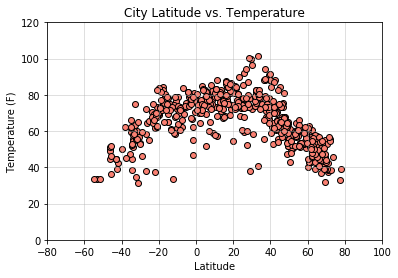

In [8]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Temperature"], 
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(0,120)
plt.xlim(-80,100)
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(alpha=0.5)

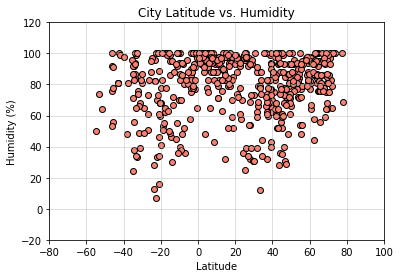

In [9]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(alpha=0.5)

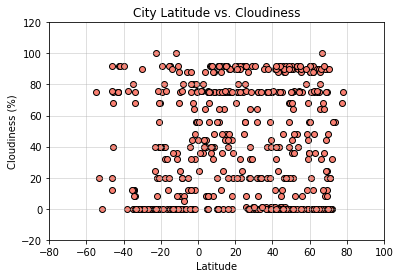

In [10]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Cloudiness"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(alpha=0.5)

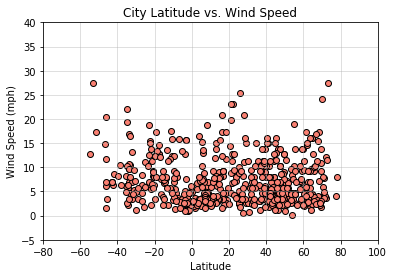

In [11]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Wind Speed"],
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(alpha=0.5)